In [1]:
import matplotlib.pyplot as plt
import numpy as np
from music21 import *

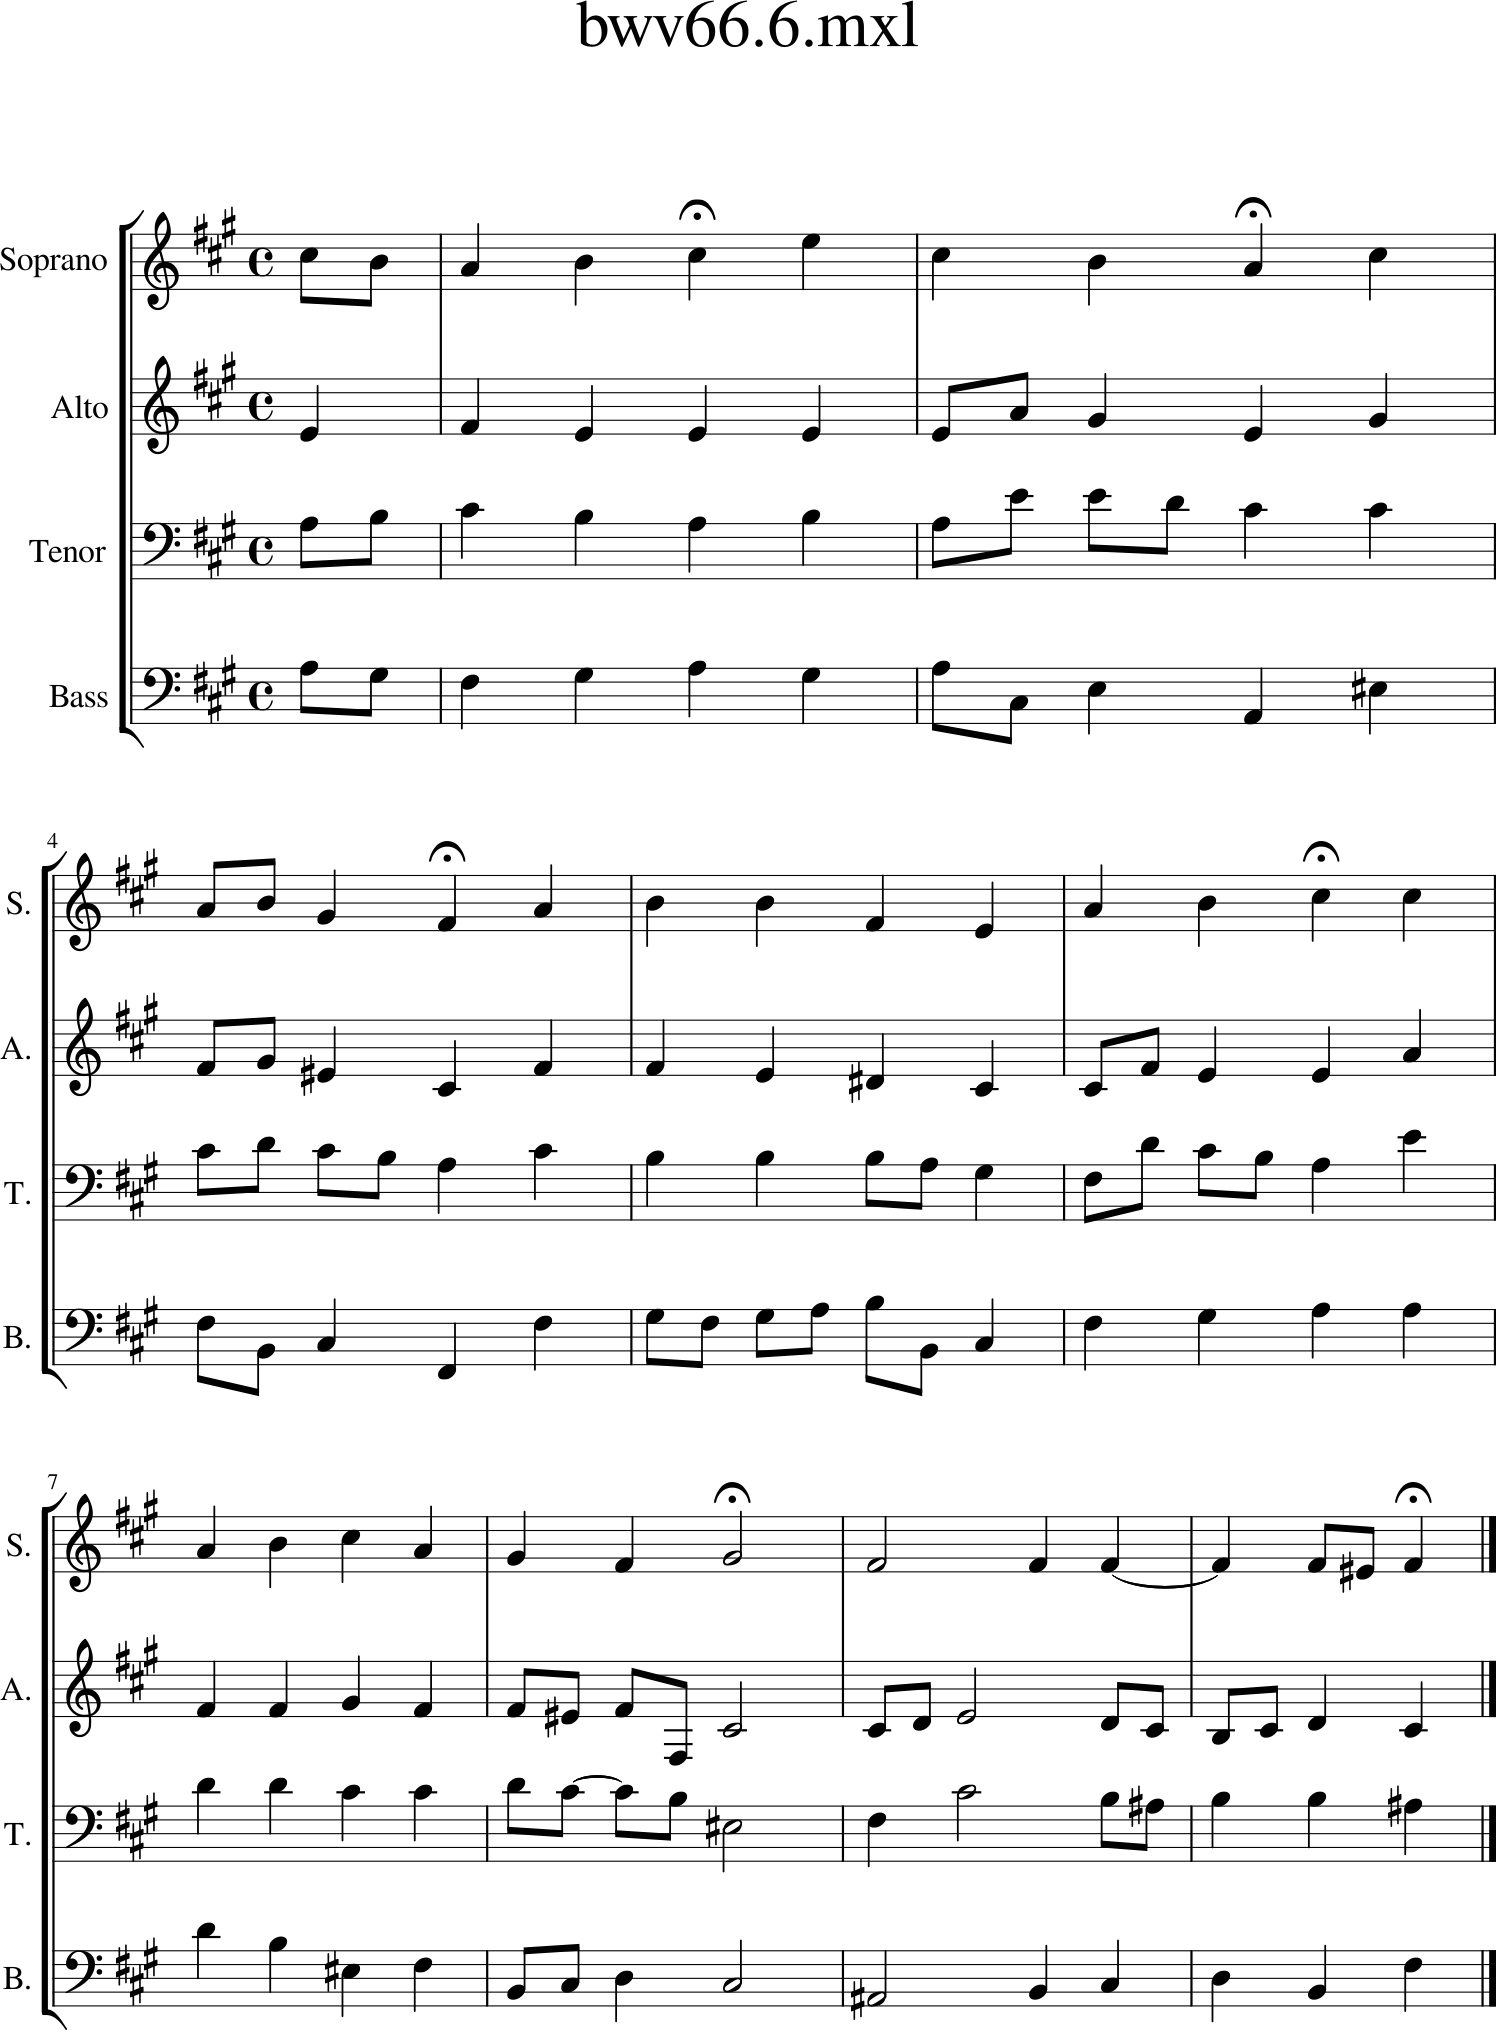

In [2]:
b = corpus.parse('bwv66.6')
b.show()

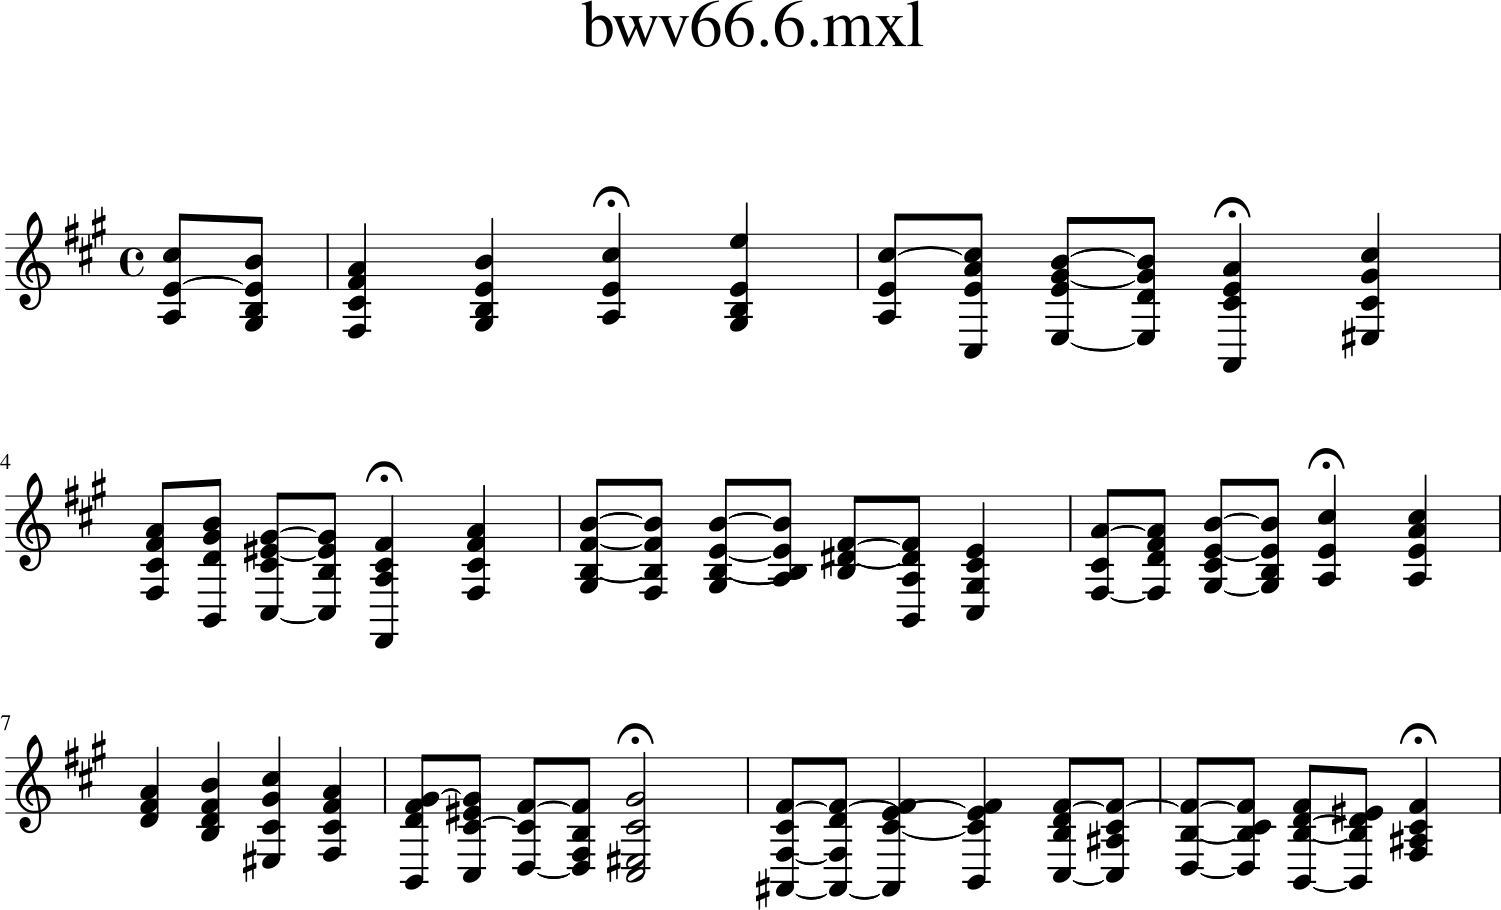

In [3]:
bChords = b.chordify()
bChords.show()

In [4]:
for thisChord in bChords.recurse().getElementsByClass(chord.Chord):
    if thisChord.isDominantSeventh():
        print(thisChord.measureNumber, thisChord.beatStr, thisChord)

2 2 1/2 <music21.chord.Chord E3 D4 G#4 B4>
3 2 1/2 <music21.chord.Chord C#3 B3 E#4 G#4>
4 3 1/2 <music21.chord.Chord B2 A3 D#4 F#4>
8 2 <music21.chord.Chord A#2 C#4 E4 F#4>


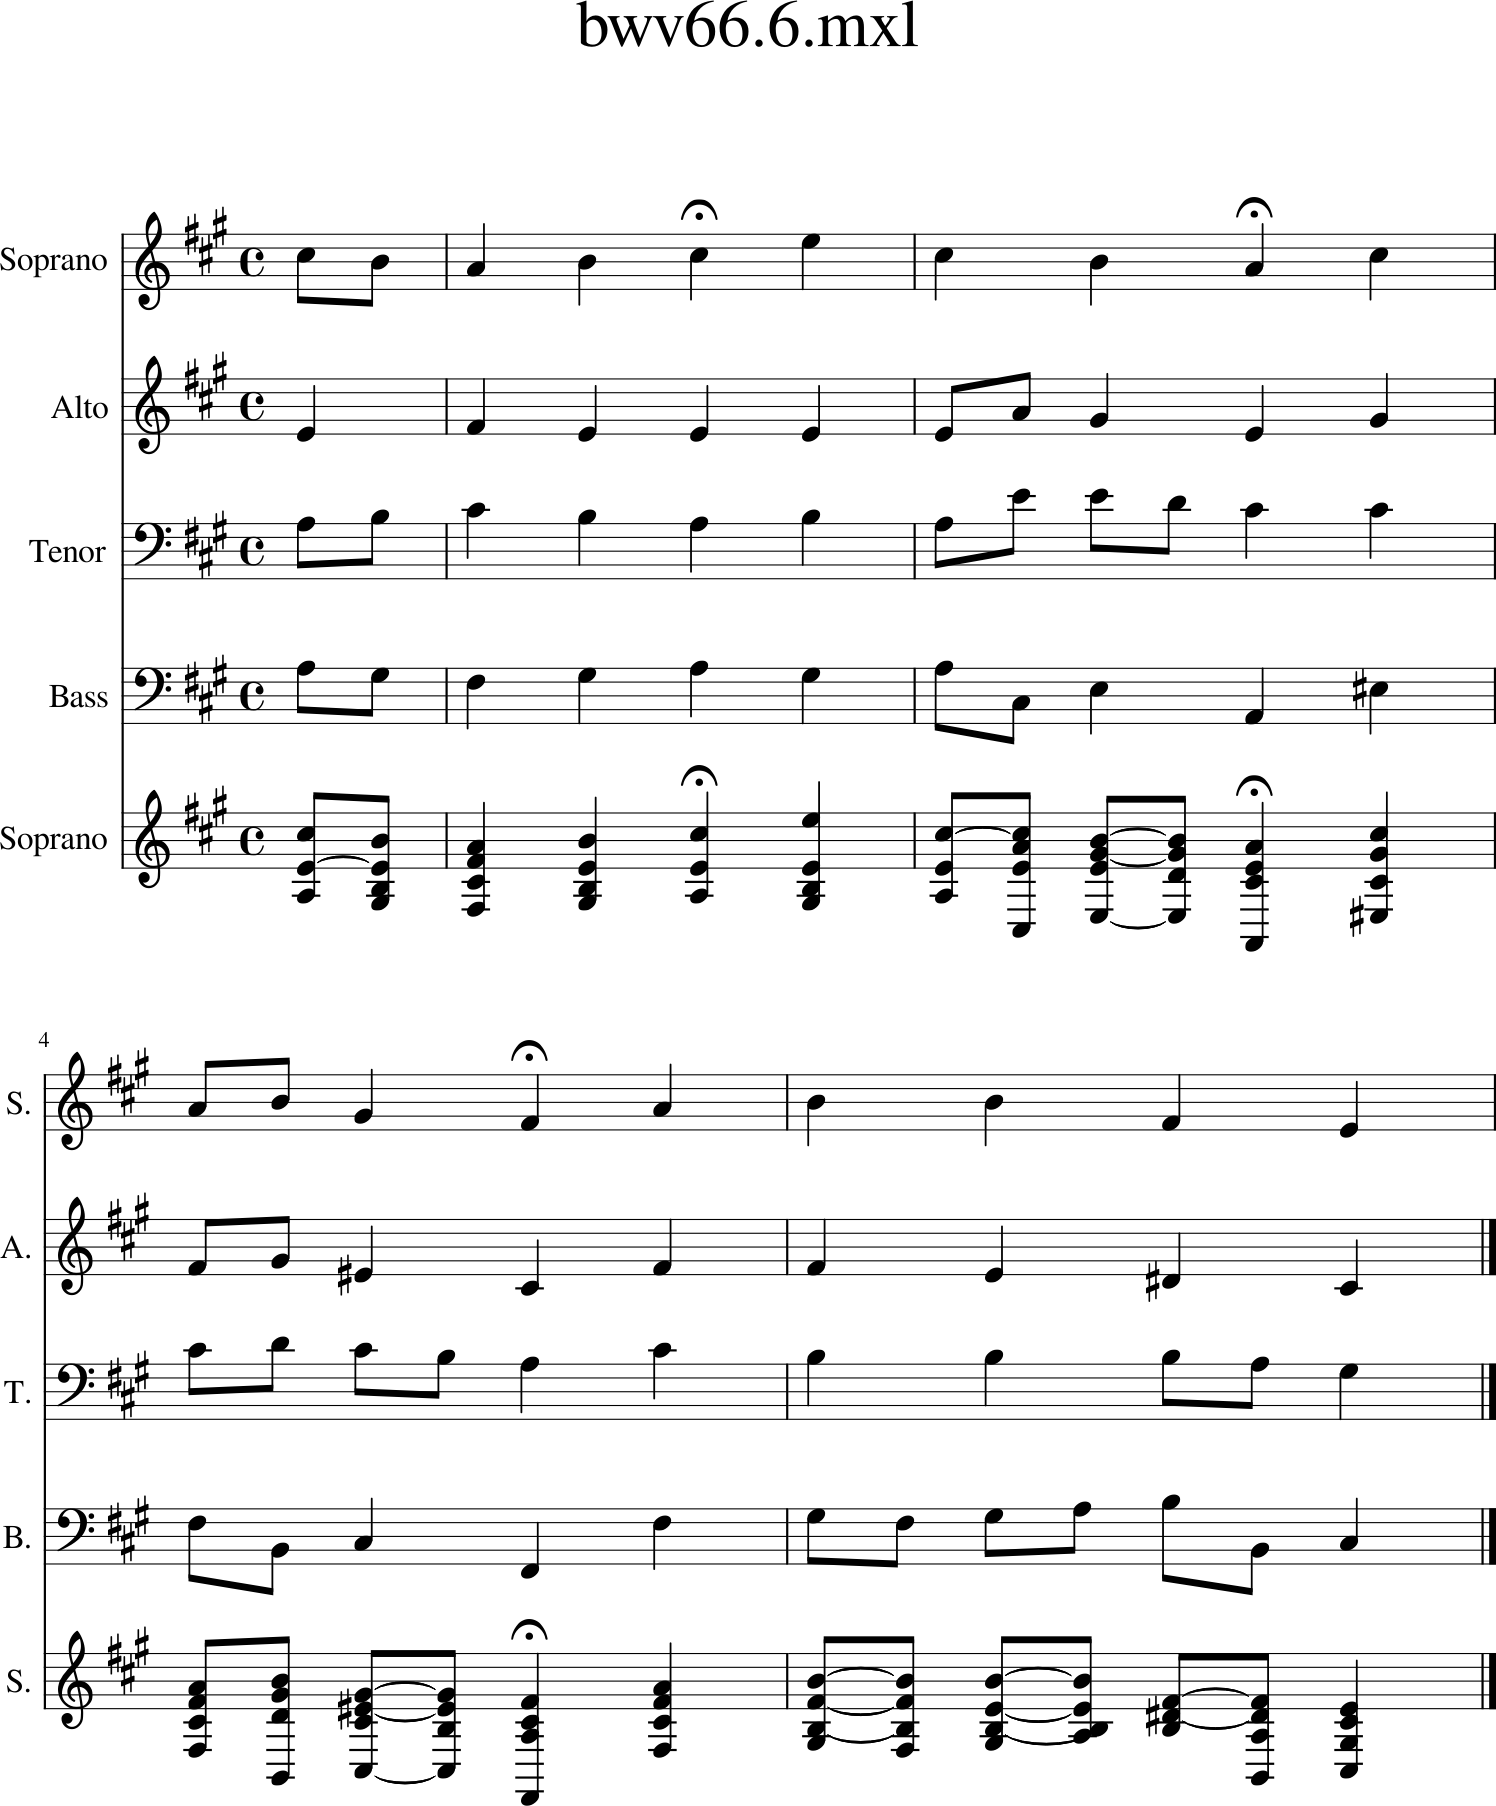

In [5]:
b.insert(0, bChords)
b.measures(0,4).show()

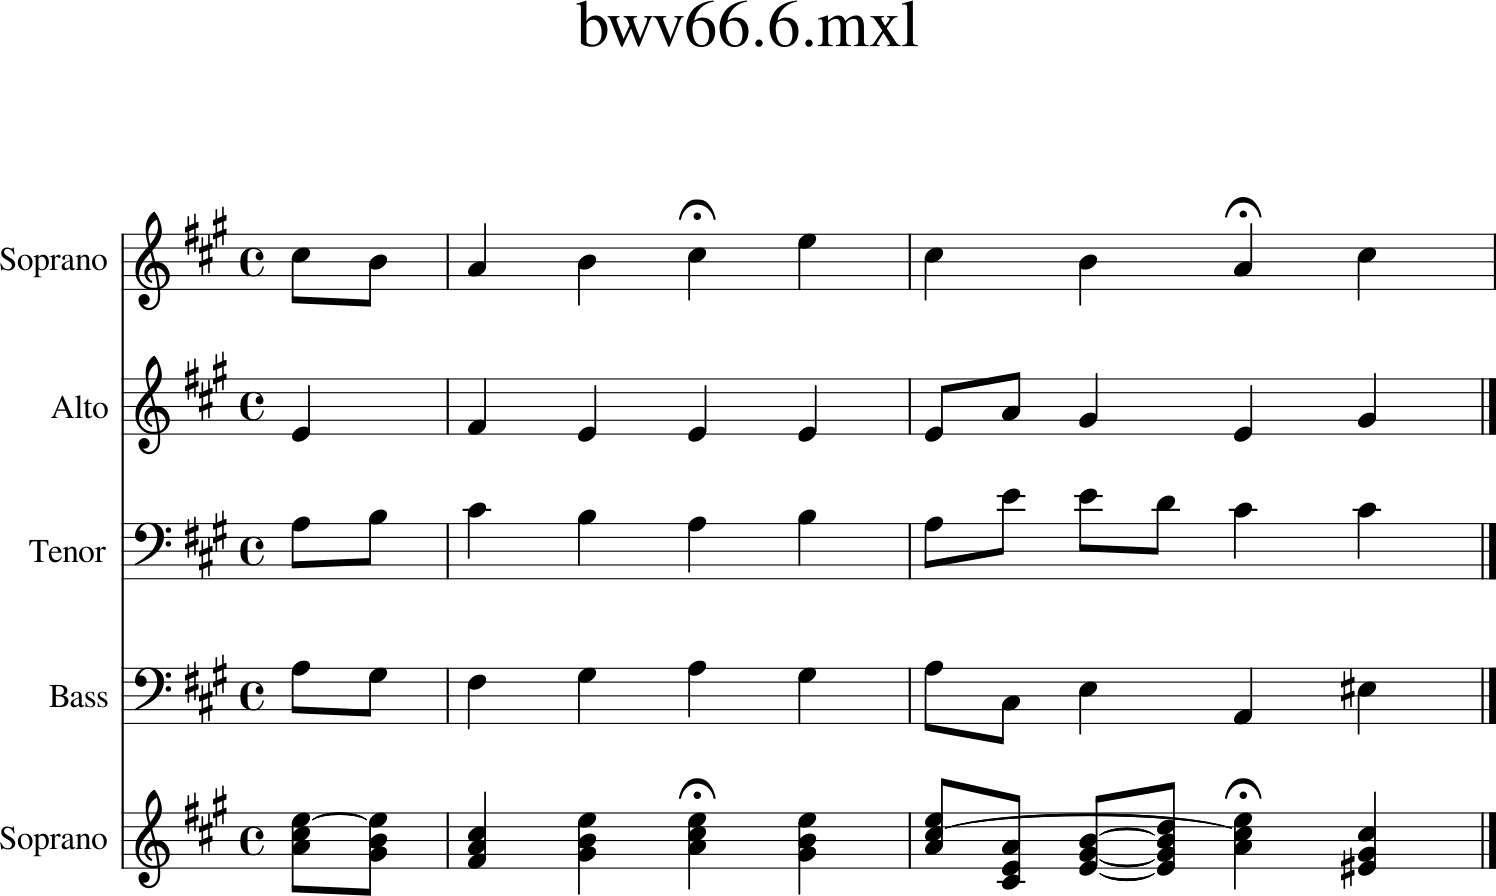

In [6]:
for c in bChords.recurse().getElementsByClass(chord.Chord):
    c.closedPosition(forceOctave=4, inPlace=True)

b.measures(0, 2).show()

In [7]:
b.analyze('key')

<music21.key.Key of f# minor>

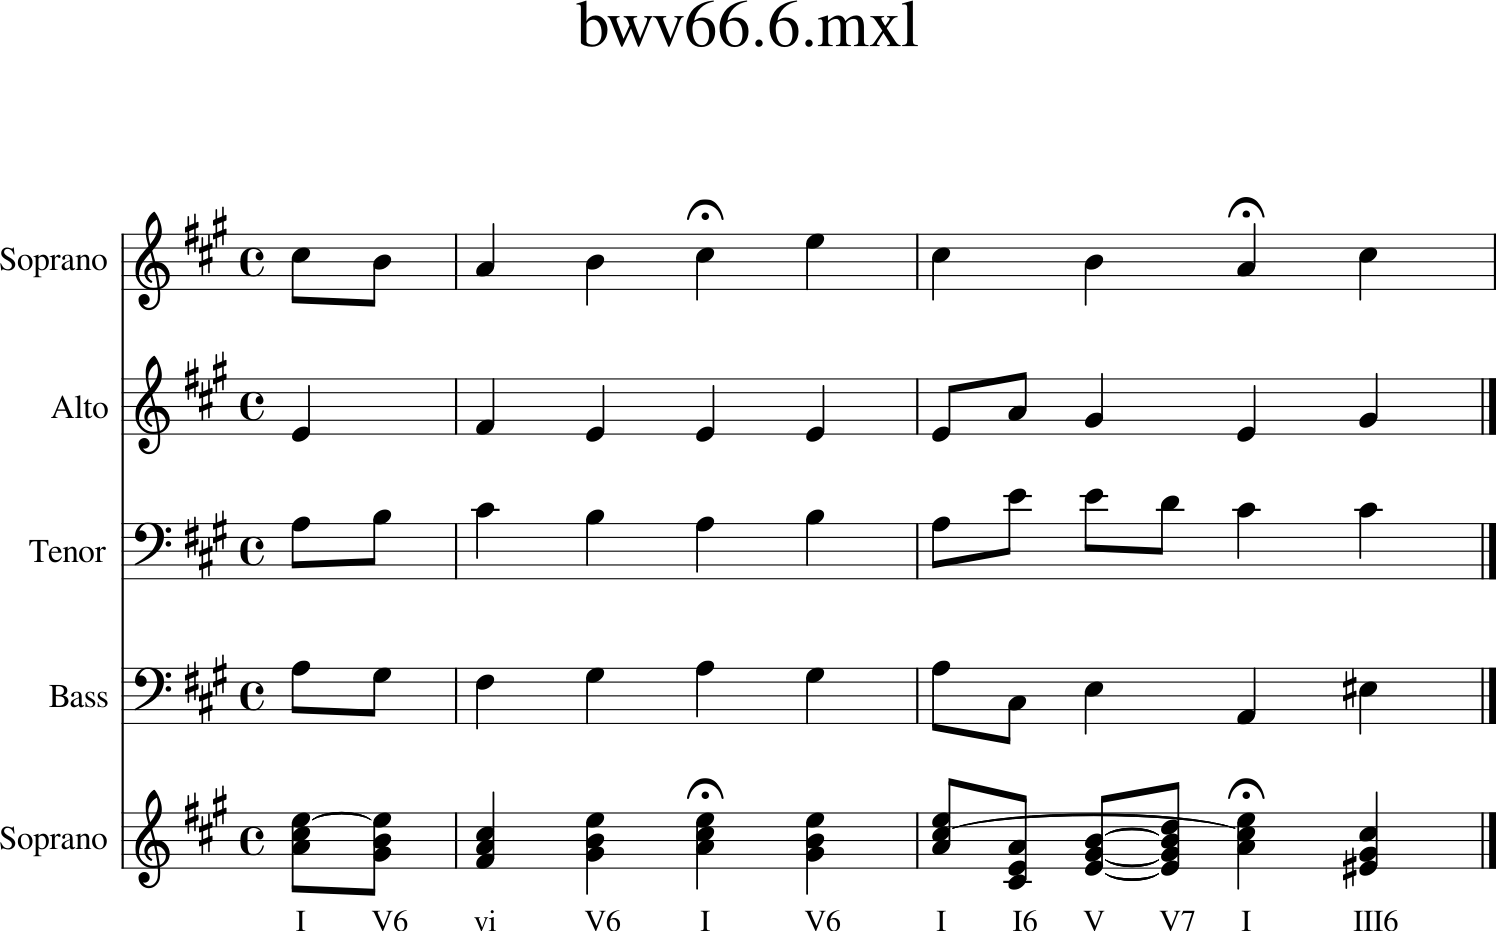

In [8]:
for c in bChords.recurse().getElementsByClass(chord.Chord):
    rn = roman.romanNumeralFromChord(c, key.Key('A'))
    c.addLyric(str(rn.figure))

b.measures(0,2).show()

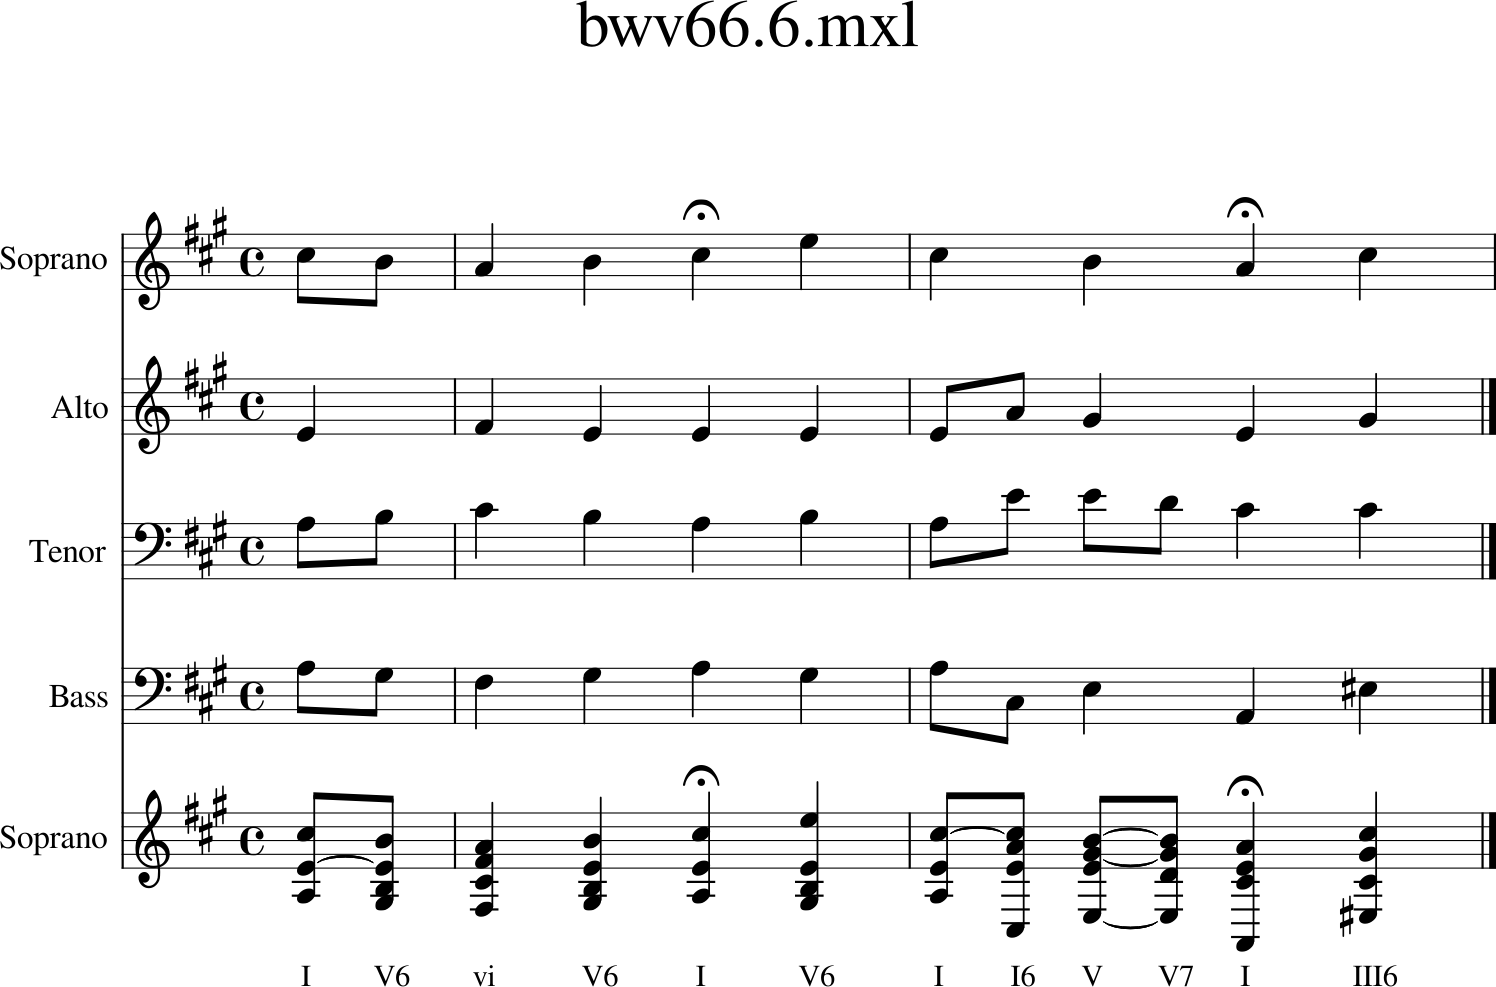

In [2]:
# are the Roman Numeral Chords the same?
from music21 import *
b2 = corpus.parse('bwv66.6')
b2Chords = b2.chordify()
b2.insert(0, b2Chords)

for c in b2Chords.recurse().getElementsByClass(chord.Chord):
    rn = roman.romanNumeralFromChord(c, key.Key('A'))
    c.addLyric(str(rn.figure))
b2.measures(0,2).show()

In [10]:
from music21 import *
configure.run()


______________________________________________________________________________ 
  
Welcome the music21 Configuration Assistant. You will be guided through a 
number of questions to install and setup music21. Simply pressing return at a 
prompt will select a default, if available. 

You may run this configuration again at a later time by running 
music21/configure.py. 
  
______________________________________________________________________________ 
  
The BSD/LGPL licensed music21 software is distributed with a corpus of encoded 
compositions which are distributed with the permission of the encoders (and, 
where needed, the composers or arrangers) and where permitted under United 
States copyright law. Some encodings included in the corpus may not be used 
for commercial uses or have other restrictions: please see the licenses 
embedded in individual compositions or directories for more details. 
  
In addition to the corpus distributed with music21, other pieces are not 
included in

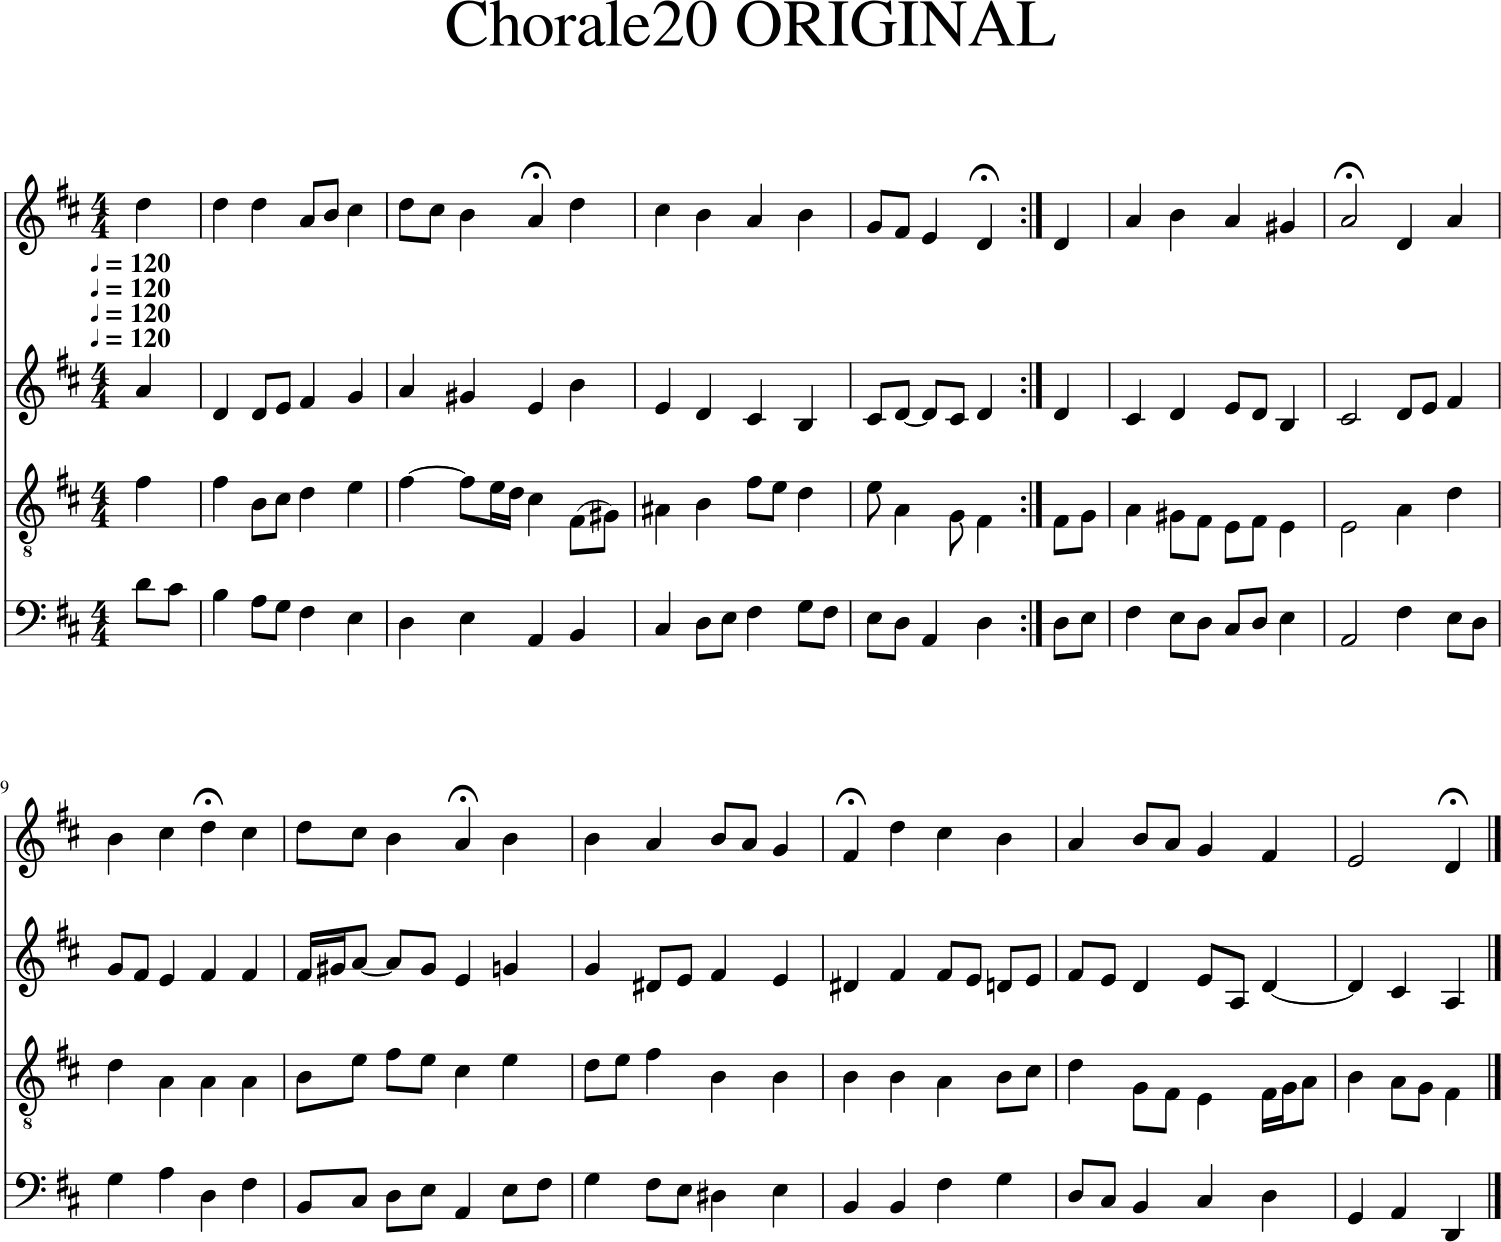

In [3]:
c = converter.parse('~/GitHub/Singing-AI-Bach/ai-music/Chorale20/Chorale20_Original.musicxml')
c.show() # show the first 4 measures

In [4]:
print(type(b2))
print(type(c))

<class 'music21.stream.Score'>
<class 'music21.stream.Score'>


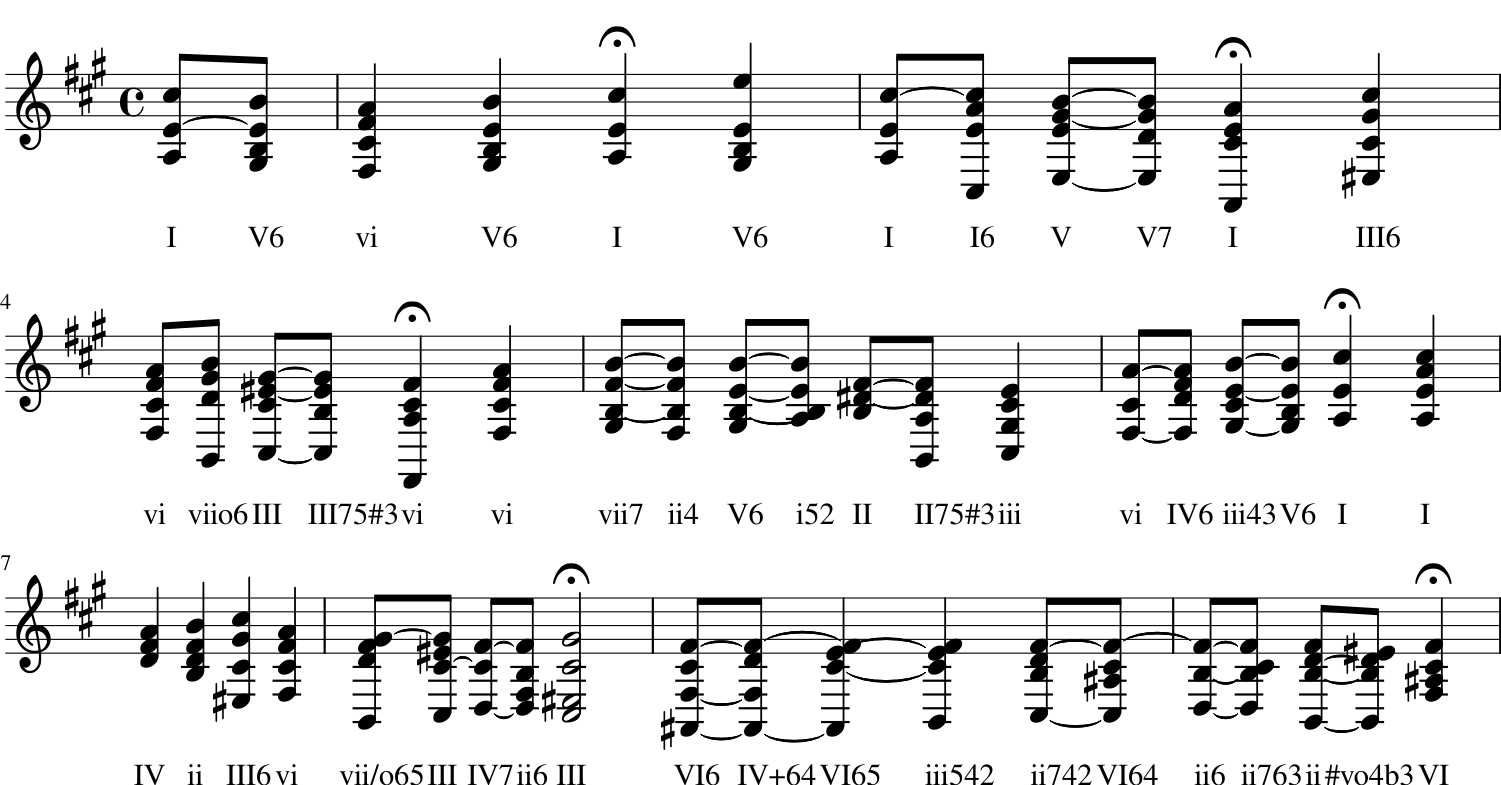

In [5]:
test = stream.Stream()

test.insert(0, b2Chords)
test.show()

In [2]:
# this code cell tries to pull the soprano part from a chorale and save the output as musicxml
from music21 import *

chorale20 = converter.parse('./ai-music/Chorale20/Chorale20_Original.musicxml')

s = stream.Score()
s.insert(0, chorale20.parts[0])
s.write('midi', fp='output.mid')

'output.mid'